In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

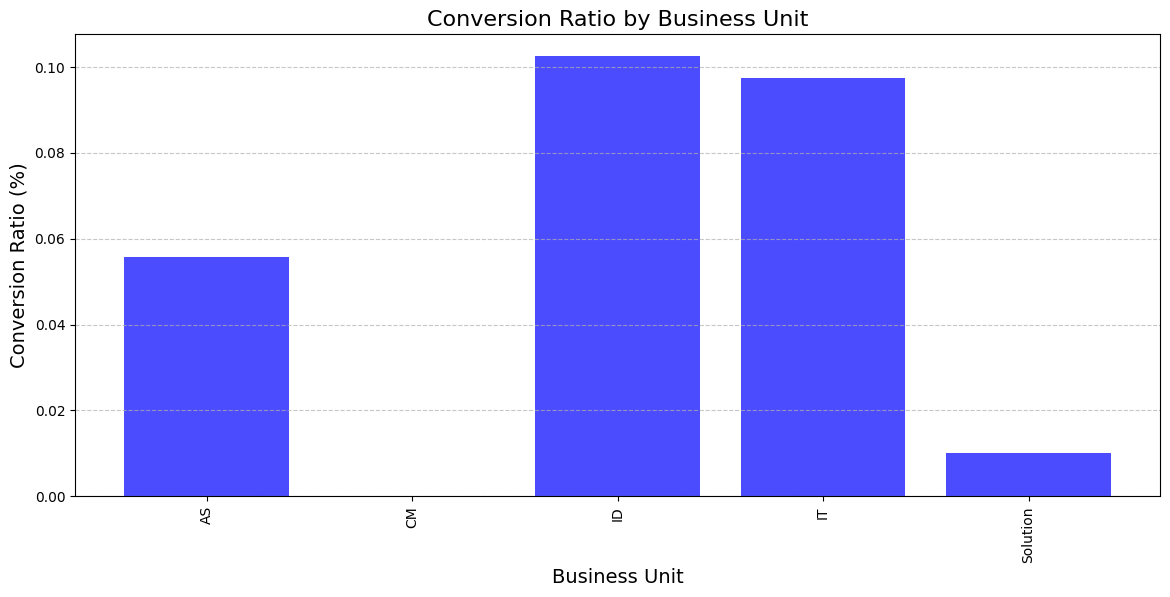

AS 별 is_converted 비율: 5.58%, 전체 갯수: 24774, is_converted된 갯수: 1383
CM 별 is_converted 비율: 0.00%, 전체 갯수: 2, is_converted된 갯수: 0
ID 별 is_converted 비율: 10.25%, 전체 갯수: 25563, is_converted된 갯수: 2620
IT 별 is_converted 비율: 9.74%, 전체 갯수: 8664, is_converted된 갯수: 844
Solution 별 is_converted 비율: 1.01%, 전체 갯수: 296, is_converted된 갯수: 3


In [20]:
df_business_unit = df.dropna(subset=['business_unit'])

converted_counts_business_unit = df_business_unit.groupby('business_unit')['is_converted'].sum().reset_index()
total_counts_business_unit = df_business_unit.groupby('business_unit')['is_converted'].count().reset_index()

ratio_df_business_unit = pd.merge(converted_counts_business_unit, total_counts_business_unit, on='business_unit', how='left')
ratio_df_business_unit['conversion_ratio'] = ratio_df_business_unit['is_converted_x'] / ratio_df_business_unit['is_converted_y']

plt.figure(figsize=(14, 6))
plt.bar(ratio_df_business_unit['business_unit'], ratio_df_business_unit['conversion_ratio'], color='blue', alpha=0.7)

plt.title('Conversion Ratio by Business Unit', fontsize=16)
plt.xlabel('Business Unit', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)

plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

for index, row in ratio_df_business_unit.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['business_unit']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")
